In [26]:
# Stdlib
from IPython.display import display, Latex

# Scientific computing
import numpy as np

# Network science
import networkx as nx

# Data handling and vis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Project source

# Miscellaneous

# Preprocessing

## Loading and concatenating dataframes

### ex23

In [27]:
# Small datasets
metadata_ex23 = {
    "PROJECT_ID": "EMB_ex23-verify",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.1",
    "DATE": "20230220"
}
TAG_ex23 = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata_ex23)

df_ex23 = pd.read_csv(f"../../results/dataframes/dataframe_{TAG_ex23}.csv", index_col="_UID")


# Concatenate larger datasets
metadata_ex23.update({
    "CURRENT_VERSION": "v1.1.1"
})
TAG_ex23 = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata_ex23)

df_ex23 = pd.concat([df_ex23, pd.read_csv(f"../../results/dataframes/dataframe_{TAG_ex23}.csv", index_col="_UID")])

### ex24

In [28]:
# Small datasets
metadata_ex24 = {
    "PROJECT_ID": "EMB_ex24-verify",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.0",
    "DATE": "20230220"
}
TAG_ex24 = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata_ex24)

df_ex24 = pd.read_csv(f"../../results/dataframes/dataframe_{TAG_ex24}.csv", index_col="_UID")


# Concatenate larger datasets
# * Not ready yet!
# metadata_ex24.update({
#     "CURRENT_VERSION": "v1.1"
# })
# TAG_ex24 = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata_ex24)

# df_ex24 = pd.concate([df_ex24, pd.read_csv(f"../../results/dataframes/dataframe_{TAG_ex24}.csv", index_col="_UID")])

## Concatenating

In [29]:
# Adding identifiers
df_ex23["experiment"] = ["ex23"] * len(df_ex23)
df_ex24["experiment"] = ["ex24"] * len(df_ex24)

In [30]:
# Concatenating across experiments
df = pd.concat([df_ex23, df_ex24])

## Pruning

In [31]:
df = df.drop(columns=["intercept", "coef"])

## Reindexing and renaming

In [32]:
# Reset index after concatenations
df = df.reset_index()
df = df.drop(columns=["_UID"])

In [33]:
# Rename layers
df = df.rename(columns={"l1": "alpha", "l2": "beta"})

In [35]:
df.describe()

,alpha,beta,theta,accuracy,auroc
count,1050.000000,1050.000000,1050.000000,975.000000,1050.000000
mean,1.714286,3.428571,0.517857,0.497064,0.333229
std,1.119327,1.466871,0.299069,0.271098,0.454967
min,1.000000,2.000000,0.050000,0.000000,-1.000000
25%,1.000000,3.000000,0.261111,0.292554,0.139241
50%,1.000000,3.000000,0.511111,0.521562,0.473211
75%,2.000000,4.000000,0.788889,0.696287,0.572426
max,6.000000,7.000000,1.000000,1.000000,1.000000


# Analysis

Text(0.5, 1.0, 'N2V distance-based likelihood reconstruction')

<Figure size 640x480 with 0 Axes>

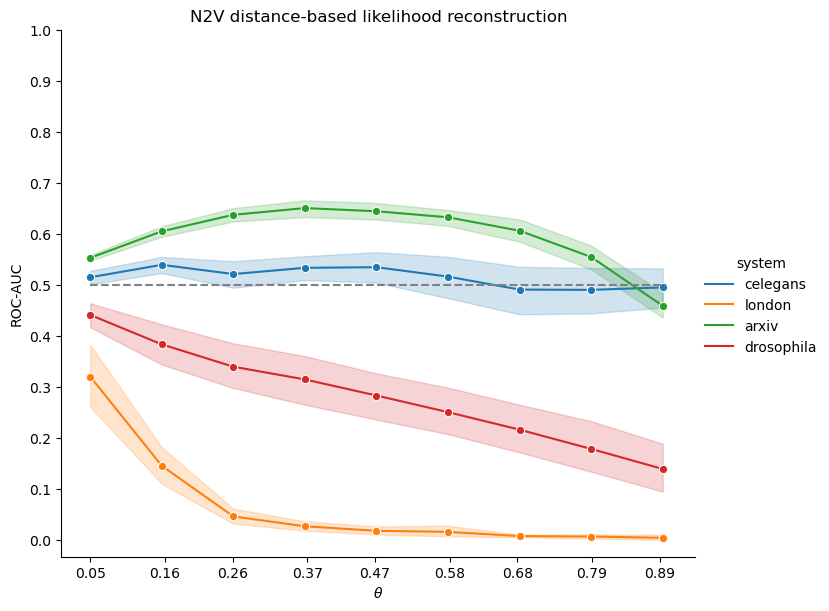

In [59]:
# Instantiate figure, subset relevant data
plt.figure()
df_ = df.query("experiment == 'ex23' and theta != 1.0")

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    hue="system",
    marker="o",
    height=6, aspect=1.2
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [np.float(np.format_float_scientific(x, precision=1)) for x in set(df_["theta"])],
    rotation=0
)
plt.xlabel("$\\theta$")

plt.yticks(np.linspace(0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("N2V distance-based likelihood reconstruction")

Text(0.5, 1.0, 'N2V logistic regression reconstruction (no component biases)')

<Figure size 640x480 with 0 Axes>

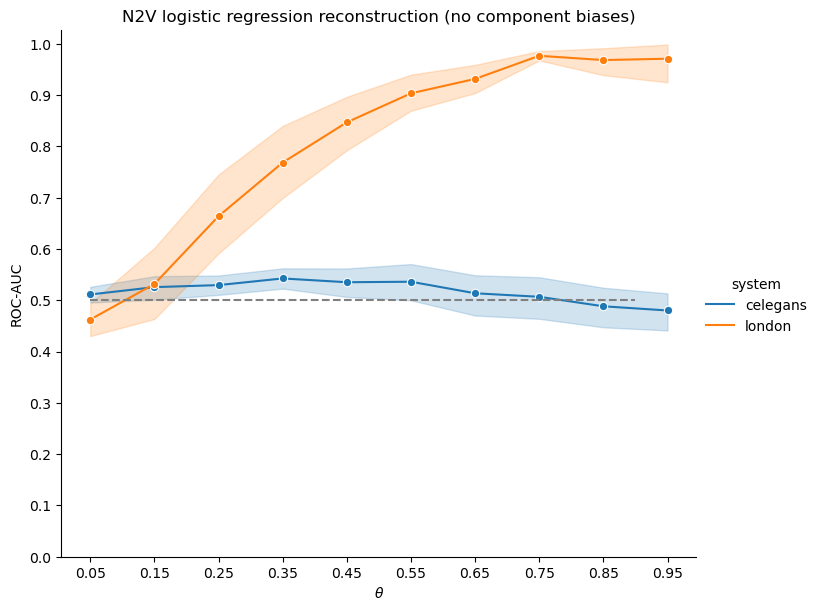

In [64]:
# Instantiate figure, subset relevant data
plt.figure()
df_ = df.query("experiment == 'ex24' and theta != 1.0 and auroc != -1.0")

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    hue="system",
    marker="o",
    height=6, aspect=1.2
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [np.float(np.format_float_scientific(x, precision=1)) for x in set(df_["theta"])],
    rotation=0
)
plt.xlabel("$\\theta$")

plt.yticks(np.linspace(0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("N2V logistic regression reconstruction (no component biases)")